In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/Dataset/Advertising.csv')

In [ ]:
df.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
df.isnull().sum()


Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

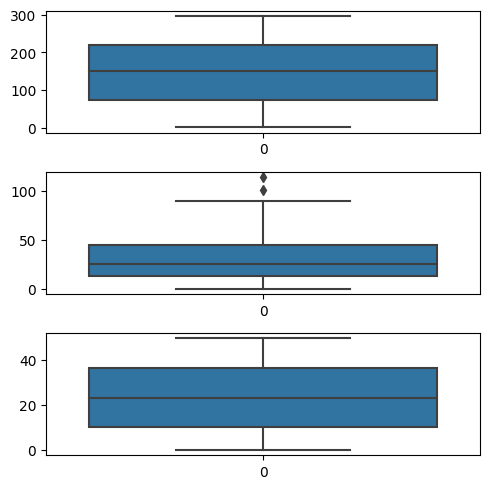

In [ ]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

<ipython-input-10-6fe4fcc6000a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Newspaper'])


<Axes: xlabel='Newspaper', ylabel='Density'>

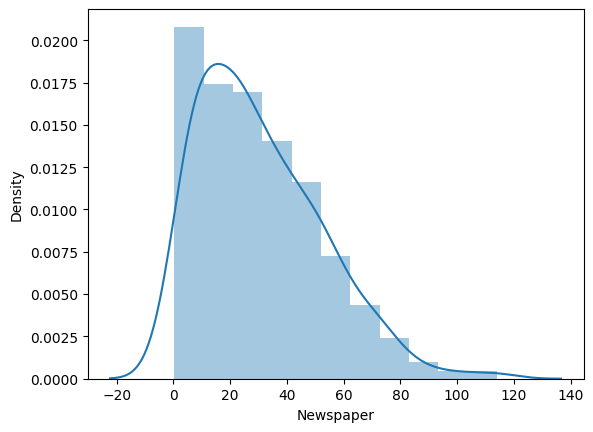

In [ ]:
sns.distplot(df['Newspaper'])


In [ ]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)


In [ ]:
data = df.copy()

In [ ]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

<Axes: >

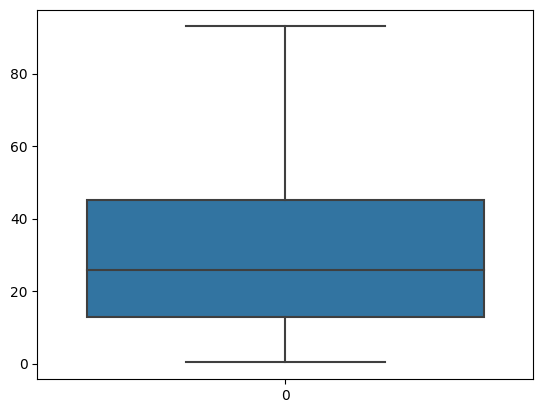

In [ ]:
sns.boxplot(data['Newspaper'])


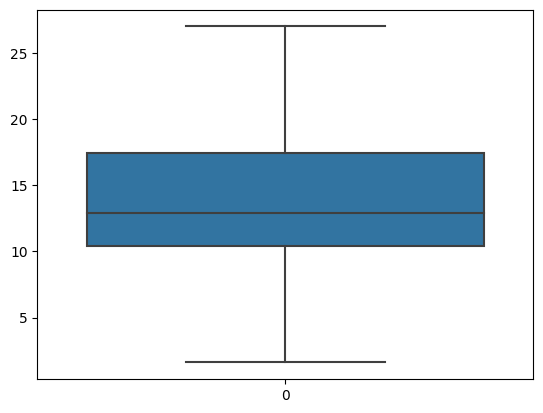

In [ ]:
sns.boxplot(data['Sales']);

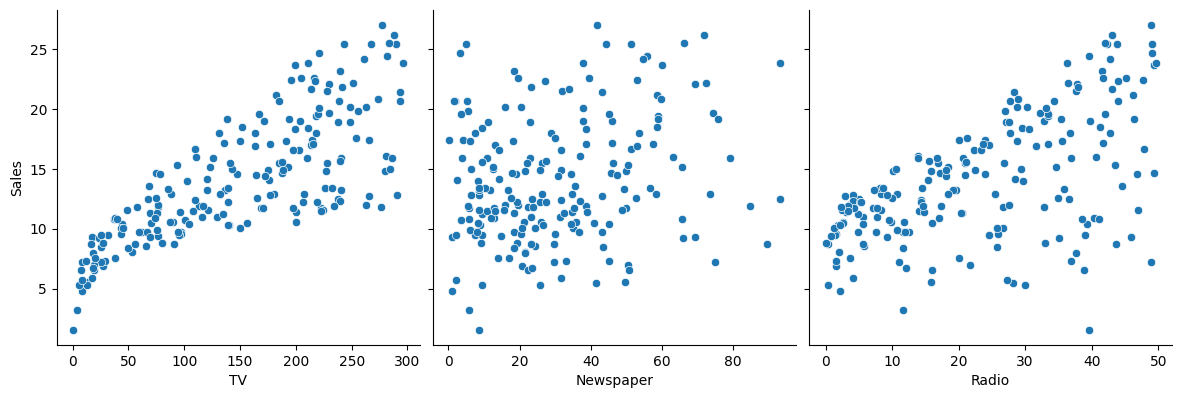

In [ ]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
            y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

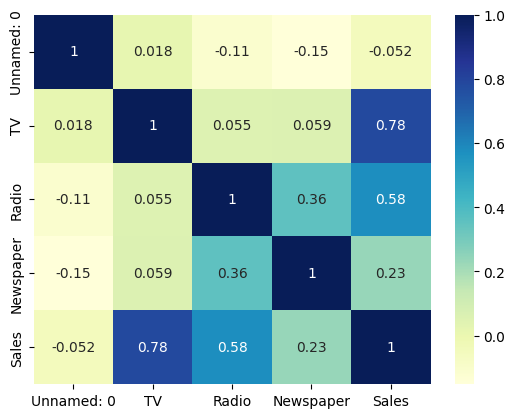

In [ ]:

sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [ ]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)


In [ ]:
print(important_features)


['TV', 'Radio', 'Sales']


In [ ]:
X = data['TV']
y = data['Sales']

In [ ]:
X = X.values.reshape(-1,1)


In [ ]:
X


array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [ ]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
print(X.shape,y.shape)


(200, 1) (200,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33)

In [ ]:
print(X_train.shape,y_train.shape)

(134, 1) (134,)


In [ ]:
from sklearn.metrics import  mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
knn = KNeighborsRegressor().fit(X_train, y_train)
knn

KNeighborsRegressor()

In [ ]:
knn_train_pred = knn.predict(X_train)


In [ ]:
knn_test_pred = knn.predict(X_test)

In [ ]:
print(knn_train_pred, knn_test_pred)

[17.24 17.62 13.7  16.12  8.74 13.76  7.9  13.38 12.68 11.24 18.52  6.28
 16.66 13.7  13.38 18.72  8.9   6.28 14.82 11.1   7.26 16.74 16.2  18.3
 18.14 18.3   7.26 12.68 13.84 17.72 19.88 17.64  9.6  14.98 16.44 16.06
 18.3  18.3  15.48 13.   11.48 16.12  9.34 15.92 19.42 20.58 11.28  8.74
 19.28  7.9  10.48 13.7   9.98 16.06  9.98 12.68 16.02 16.56 11.04 18.02
 17.28  7.26 16.06 11.48 15.24 17.64 13.58 19.16 13.58 11.48 14.36 18.9
 18.32 19.58 16.02 17.64 15.52 18.3   7.9  18.52 13.7   7.18  6.9  16.28
 14.82 10.66 20.58  7.18  9.98 17.62 18.78 13.2  11.48 14.36 19.38 12.36
 14.86 13.34  9.32 14.6  19.16 16.74 15.9  18.02 18.02 16.06  7.18 11.1
 18.3  14.66 18.14 16.02 20.58 19.76  9.6  14.66  9.98 19.28 19.38 12.36
  9.6  16.12 16.06  6.28 16.12 16.56 13.76  7.18 15.76 13.4  16.42 12.68
 14.44 20.26] [16.74  8.96 18.5   7.9  13.38 11.28 17.64 18.52 17.98 13.96 12.36  7.9
 10.66  7.9  18.3   7.9   6.28  8.9  15.82 14.98 19.58  6.9  18.02 12.68
  8.9  18.32 11.48  7.26 13.22  9.12 12.6

In [ ]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])

In [ ]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.6592710378426669
RMSE: 3.2929152599316773


<ipython-input-39-75cbb9d6b8eb>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)


In [ ]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.575544,0.659271,3.292915,-0.083727


In [ ]:
svr = SVR().fit(X_train,y_train)
svr

SVR()

In [ ]:
svr_train_pred = svr.predict(X_train)
svr_test_pred = svr.predict(X_test)

In [ ]:
print(svr_train_pred,svr_test_pred)


[17.27696725 16.86026059 12.071715   16.51069019  8.50120511 12.52070096
  7.90935338 13.80168179 13.29508341 10.06536703 16.37937376  7.52738184
 17.00529248 12.071715   13.89378827 15.95556177  8.67875651  7.51447889
 15.0602163  11.39725253  7.6685854  15.93660668 17.32014875 17.40377833
 16.22631453 17.42313416  7.68469966 13.34574037 12.96318549 17.4354404
 17.19108913 15.4649661   9.40551019 16.78323925 16.11566283 17.43057346
 17.23494388 17.39467355 17.44232865 11.85917755 10.53617183 16.52018746
  9.25223245 14.92686803 16.3390407  17.31847004 10.22134166  8.43765587
 17.13145506  7.892251    9.75389493 12.10801802 11.50010821 17.42535259
 11.47793365 13.29966626 17.43624337 14.73112361 11.77994439 16.84583432
 17.41216596  7.66190925 17.42741824 10.48815418 17.34875711 15.59709919
 12.71174882 16.16853794 12.60558778 10.63119487 15.32174932 17.21480545
 16.44811239 17.09158619 17.4392622  15.73425299 15.54144397 17.23247541
  8.01874635 16.22314493 12.19637497  7.72173082  7.

In [ ]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5851894789156324
RMSE: 3.633297090319194


<ipython-input-45-6a30410dba6a>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)


In [ ]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.575544,0.659271,3.292915,-0.083727
1,Support Vector Machine,0.520675,0.585189,3.633297,-0.064514


In [ ]:
import statsmodels.api as sm

In [ ]:
X_train_constant = sm.add_constant(X_train)

In [ ]:
model = sm.OLS(y_train, X_train_constant).fit()

In [ ]:
model.params

const    7.474239
x1       0.043586
dtype: float64

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     147.7
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           2.81e-23
Time:                        10:02:30   Log-Likelihood:                -353.69
No. Observations:                 134   AIC:                             711.4
Df Residuals:                     132   BIC:                             717.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4742      0.641     11.660      0.0

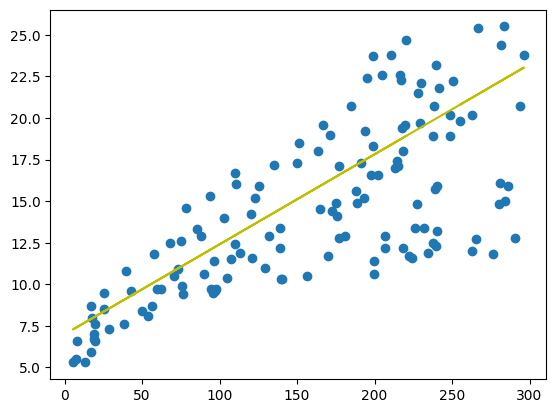

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9955 + 0.0541 * X_train, 'y')
plt.show()

In [ ]:
y_train_pred = model.predict(X_train_constant)
res = (y_train - y_train_pred)
res

128    7.623677
43    -3.592265
71     0.139974
55     7.556426
190    1.604099
         ...   
94    -0.655418
36     6.292550
186   -3.254542
73    -2.114319
109    1.193794
Name: Sales, Length: 134, dtype: float64

In [ ]:
y_train_pred

array([17.07632314, 16.49226534, 12.26002561, 16.14357412,  9.19590149,
       12.74819333,  8.59005049, 13.99912309, 13.54146586, 10.42939669,
       19.53459627,  7.81421251, 16.66225231, 12.26002561, 14.07757862,
       19.93994981,  9.3484539 ,  7.70960515, 14.99289308, 11.56700181,
        8.2239247 , 15.65976504, 17.16785459, 17.41193844, 15.89513162,
       17.50346989,  8.25443518, 13.5894109 , 13.21456784, 17.5906427 ,
       16.92377073, 20.39324841,  9.92379442, 16.40945118, 15.80360017,
       17.9044648 , 16.99786762, 17.37706932, 17.69525006, 12.03337632,
       10.80423976, 16.1522914 ,  9.80611113, 14.89264435, 15.99102171,
       18.30110106, 10.55143862,  9.13923916, 16.83223928,  8.56825728,
       10.18967147, 12.29925338, 11.66725053, 17.93933392, 11.64545733,
       13.5458245 , 17.85651975, 14.74445058, 11.95056215, 19.03335263,
       18.00907216,  8.21084878, 17.926258  , 10.76501199, 17.23759283,
       20.27120648, 12.95304942, 19.73945236, 12.83972477, 10.88

<ipython-input-55-66f56fd38cf4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


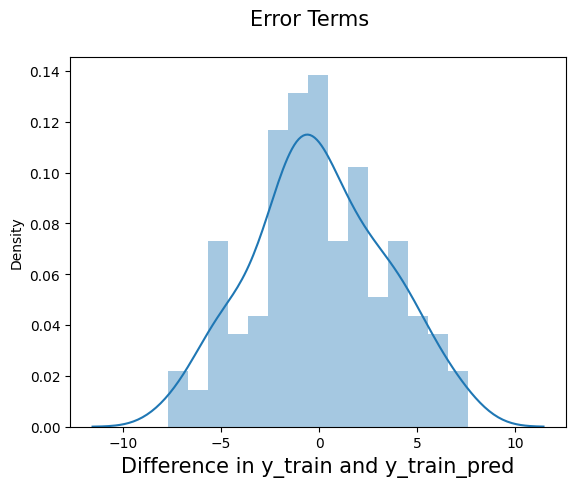

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

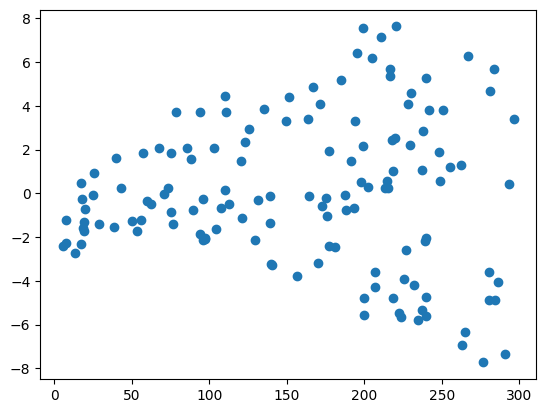

In [ ]:
plt.scatter(X_train, res)
plt.show()

In [ ]:
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)

In [ ]:
y_pred

array([15.66412369,  9.08257684, 19.40383706,  8.56389864, 14.00348173,
       10.49041765, 20.240696  , 19.54331355, 20.10121951, 13.89451573,
       11.4144494 ,  8.64235417, 10.39016893,  8.51159496, 17.42501436,
        8.67286465,  7.84908164,  9.4138335 , 15.43311575, 16.37022341,
       16.7799356 ,  8.04957909, 19.05078719, 13.63299731,  9.35281254,
       16.08691179, 10.79988112,  8.2239247 , 12.53026131,  9.57946183,
       13.48480354,  9.13052188, 10.45554853,  7.65294282,  7.98419948,
       10.96986809, 14.6921469 , 14.59189817, 15.53336448, 13.188416  ,
       13.70273555,  7.85344028, 10.35529981, 10.73014287, 20.00968806,
        8.84721026,  7.84036435, 10.75629471, 11.85031343,  7.50474905,
       11.27497291, 10.80423976, 14.81418883, 10.48170037, 12.582565  ,
       12.71332421,  9.42255078, 16.65789367, 17.08504042, 17.16785459,
       16.60994863, 13.32789249, 13.41070665, 18.53646764, 18.86336566,
       18.07445177])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.990735291674938

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.7189368610818695

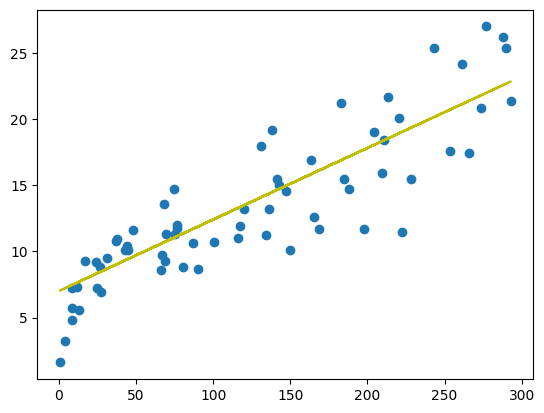

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9955 + 0.0541 * X_test, 'y')
plt.show()